In [1]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

https://figshare.com/articles/dataset/Microsecond_molecular_dynamics_simulation_of_kinase_domain_of_the_human_tyrosine_kinase_ABL1/4496795/1

This is a one microsecond trajectory of the catalytic domain of the human tyrosine protein kinase ABL1 (UNIPROT:ABL1_HUMAN, residues 242-493). The simulation was generated on Folding@home using OpenMM 6.3.1 with the AMBER99SB-ILDN forcefield, TIP3P water, and neutralizing salt. A Langevin integrator with 2 fs timestep, 300 K temperature, and 1/ps collision rate was used. PME with a nonbonded cutoff of 1.0 nm was used with default tolerance of 5.0e-4. A long-range isotropic dispersion correction was used to correct for the truncation of Lennard-Jones interactions at 1.0 nm. A molecular-scaling Monte Carlo barostat was applied using a 1 atm reference pressure, with MC moves attempted every 50 steps. Coordinates were saved every 250ps, and waters and ions stripped. The trajectory file contains 4000 snapshots. Initial models were generated with Ensembler (see References) using the ABL1 structure from chain B of PDB ID: 2GQG as a template.

https://www.rcsb.org/structure/2GQG

Trajetories and pdb can be downloaded here:
https://www.dropbox.com/s/qymy39ak2apqd75/ABL1.zip?dl=0


In [2]:
pdb='/Users/nazlicoban/Desktop/Chem1016_S24/Exercise2/ABL1.pdb'
trajectory='/Users/nazlicoban/Desktop/Chem1016_S24/Exercise2/ABL1.dcd'
outdir='/Users/nazlicoban/Desktop/Chem1016_S24/Exercise2/output'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

outdir: /Users/nazlicoban/Desktop/Chem1016_S24/Exercise2/output
pdb: /Users/nazlicoban/Desktop/Chem1016_S24/Exercise2/ABL1.pdb
trjaectory: /Users/nazlicoban/Desktop/Chem1016_S24/Exercise2/ABL1.dcd


In [4]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [5]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4062

Number of residues: 252

Number of frames: 4000

Starting frame: 0

Last frame: 4000

sequence:  [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER3

In [6]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id

array([242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 42

In [7]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'H', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [8]:
dssp[200]

array(['C', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'E', 'E',
       'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'E', 'C', 'C', 'E', 'E', 'E', 'E', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'C', 'C', 'C',
       'C', 'E', 'E', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C',
       'E', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'E', 'E', 'E',
       'C', 'H', 'H', 'H', 'C', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'E', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H',
       'H', 'H', 'H', 'C', 'E', 'E', 'E', 'C', 'C', 'H', 'H', 'H

In [9]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame]))
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['366' 'H']
 ['367' 'H']
 ['368' 'H']
 ['373' 'H']
 ['374' 'H']
 ['375' 'H']
 ['403' 'H']
 ['404' 'H']
 ['405' 'H']
 ['408' 'H']
 ['409' 'H']
 ['410' 'H']
 ['411' 'H']
 ['412' 'H']
 ['413' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H

(242.0, 400.0)

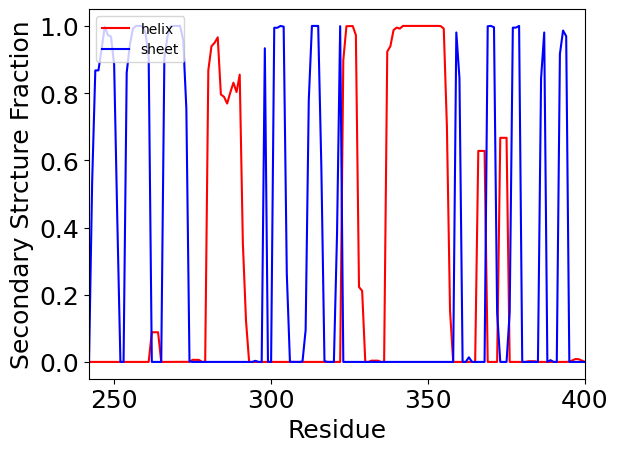

In [10]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(242,400)


***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

In [12]:
####HOMEWORK ######
#Use the full DSSP Definition and plot the population of another secondary structure type 
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

dssp_full=md.compute_dssp(trj,simplified=False)
dssp_full


array([[' ', 'E', 'E', ..., 'T', 'T', ' '],
       [' ', 'E', 'E', ..., 'H', 'T', ' '],
       [' ', 'E', 'E', ..., 'T', 'T', ' '],
       ...,
       [' ', 'E', 'E', ..., 'T', ' ', ' '],
       [' ', 'E', 'E', ..., 'T', ' ', ' '],
       [' ', 'E', 'E', ..., 'T', ' ', ' ']], dtype='<U2')

In [18]:
dssp_full[250]

array([' ', ' ', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'T', 'T', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', 'E', 'G', 'G', 'G', 'T', 'E', 'E',
       'E', 'E', 'E', 'E', 'E', 'E', ' ', 'T', 'T', 'T', 'S', ' ', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', ' ',
       ' ', ' ', 'T', 'T', 'B', ' ', ' ', 'E', 'E', 'E', 'E', ' ', 'S',
       'S', ' ', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', ' ', ' ', 'T',
       'T', ' ', 'B', 'H', 'H', 'H', 'H', 'H', 'T', 'T', ' ', ' ', 'T',
       'T', 'T', 'S', ' ', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T', 'T',
       'B', ' ', ' ', 'S', ' ', ' ', ' ', 'G', 'G', 'G', 'E', 'E', 'E',
       ' ', 'G', 'G', 'G', ' ', 'E', 'E', 'E', ' ', ' ', ' ', 'S', 'S',
       ' ', ' ', 'B', ' ', 'S', 'S', 'S', 'E', 'E', 'E', ' ', ' ', 'T',
       'T', ' ', ' ', ' ', ' ', 'T', 'T', 'T', ' ', ' ', 'H', 'H', 'H',
       'H', 'H', 'S', 'S', 'E', 'E', 'E', 'T', 'T', 'S', 'T', 'H

In [53]:
print(dssp.shape)
print("Rows:",len(dssp_full))
print("Columns:",len(dssp_full[0]))

#Printing out every residues for a given frame
frame=0
dssp_full_frame=np.column_stack((residue_id,dssp_full[frame]))
a_helix_res=np.where(dssp_full_frame[:,1]=='H')
i_beta_res=np.where(dssp_full_frame[:,1]=='B')
extended_beta=np.where(dssp_full_frame[:,1]=='E')
helix_three=np.where(dssp_full_frame[:,1]=='G')
phi_helix=np.where(dssp_full_frame[:,1]=='I')
hydrb_turn=np.where(dssp_full_frame[:,1]=='T')
bend =np.where(dssp_full_frame[:,1]=='S')
irregular_el = np.where(dssp_full_frame[:,1]==' ')


print('helical residues:',dssp_full_frame[a_helix_res])
print('beta residues:',dssp_full_frame[i_beta_res])
print('Extended strand:',dssp_full_frame[extended_beta])
print('3-helix (3/10 helix):',dssp_full_frame[helix_three])
print('5 helix (pi helix):',dssp_full_frame[phi_helix])
print('hydrogen bonded turn:',dssp_full_frame[hydrb_turn])
print('bend:',dssp_full_frame[bend])
print('Loops and irregular elements:',dssp_full_frame[irregular_el])


(4000, 252)
Rows: 4000
Columns: 252
helical residues: [['280' 'H']
 ['281' 'H']
 ['282' 'H']
 ['283' 'H']
 ['284' 'H']
 ['285' 'H']
 ['286' 'H']
 ['287' 'H']
 ['288' 'H']
 ['289' 'H']
 ['323' 'H']
 ['324' 'H']
 ['325' 'H']
 ['326' 'H']
 ['327' 'H']
 ['337' 'H']
 ['338' 'H']
 ['339' 'H']
 ['340' 'H']
 ['341' 'H']
 ['342' 'H']
 ['343' 'H']
 ['344' 'H']
 ['345' 'H']
 ['346' 'H']
 ['347' 'H']
 ['348' 'H']
 ['349' 'H']
 ['350' 'H']
 ['351' 'H']
 ['352' 'H']
 ['353' 'H']
 ['354' 'H']
 ['355' 'H']
 ['356' 'H']
 ['357' 'H']
 ['408' 'H']
 ['420' 'H']
 ['421' 'H']
 ['422' 'H']
 ['423' 'H']
 ['424' 'H']
 ['425' 'H']
 ['426' 'H']
 ['427' 'H']
 ['428' 'H']
 ['429' 'H']
 ['430' 'H']
 ['431' 'H']
 ['432' 'H']
 ['433' 'H']
 ['449' 'H']
 ['450' 'H']
 ['451' 'H']
 ['452' 'H']
 ['453' 'H']
 ['466' 'H']
 ['467' 'H']
 ['468' 'H']
 ['469' 'H']
 ['470' 'H']
 ['471' 'H']
 ['472' 'H']
 ['473' 'H']
 ['474' 'H']
 ['475' 'H']
 ['486' 'H']
 ['487' 'H']
 ['488' 'H']
 ['489' 'H']
 ['490' 'H']]
beta residues: [['298'

(240.0, 320.0)

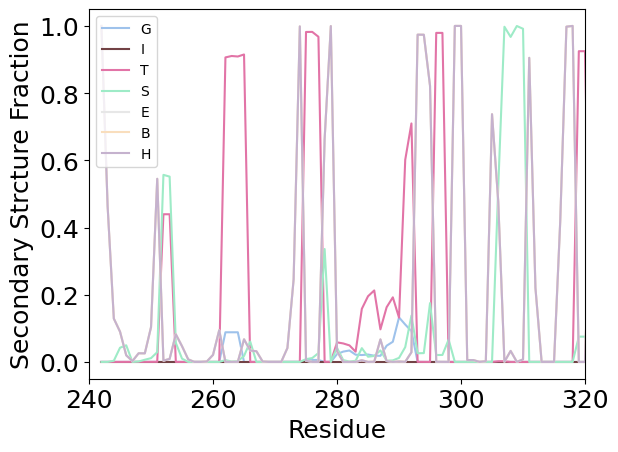

In [157]:
# Definning the population of each secondary structure type

def dssp_full_convert(dssp_full):
    
    dsspHf = np.copy(dssp_full)
    dsspB = np.copy(dssp_full)
    dsspE1 = np.copy(dssp_full)
    dsspG = np.copy(dssp_full)
    dsspI = np.copy(dssp_full)
    dsspT = np.copy(dssp_full)
    dsspS = np.copy(dssp_full)
    dsspe = np.copy(dssp_full)

    dsspHf[dsspHf == 'H'] = 1
    dsspHf[dsspHf == 'B'] = 0
    dsspHf[dsspHf == 'E'] = 0
    dsspHf[dsspHf == 'G'] = 0
    dsspHf[dsspHf == 'I'] = 0
    dsspHf[dsspHf == 'T'] = 0
    dsspHf[dsspHf == 'S'] = 0
    dsspHf[dsspHf == ' '] = 0
    dsspHf = dsspHf.astype(int)
    TotalHf = np.sum(dsspHf, axis=1)
    Hfprop = np.sum(dsspHf, axis=0).astype(float) / len(dssp_full)

    dsspB[dsspB == 'H'] = 0
    dsspB[dsspB == 'B'] = 1
    dsspB[dsspB == 'E'] = 0
    dsspB[dsspB == 'G'] = 0
    dsspB[dsspB == 'I'] = 0
    dsspB[dsspB == 'T'] = 0
    dsspB[dsspB == 'S'] = 0
    dsspB[dsspB == ' '] = 0
    dsspB = dsspB.astype(int)
    TotalB = np.sum(dsspB, axis=1)
    Bprop = np.sum(dsspB, axis=0).astype(float) / len(dssp_full)

    dsspE1[dsspE1 == 'H'] = 0
    dsspE1[dsspE1 == 'B'] = 0
    dsspE1[dsspE1 == 'E'] = 1
    dsspE1[dsspE1 == 'G'] = 0
    dsspE1[dsspE1 == 'I'] = 0
    dsspE1[dsspE1 == 'T'] = 0
    dsspE1[dsspE1 == 'S'] = 0
    dsspE1[dsspE1 == ' '] = 0
    dsspE1 = dsspE1.astype(int)
    TotalE1 = np.sum(dsspE1, axis=1)
    E1prop = np.sum(dsspE1, axis=0).astype(float) / len(dssp_full)


    dsspG[dsspG == 'H'] = 0
    dsspG[dsspG == 'B'] = 0
    dsspG[dsspG == 'E'] = 0
    dsspG[dsspG == 'G'] = 1
    dsspG[dsspG == 'I'] = 0
    dsspG[dsspG == 'T'] = 0
    dsspG[dsspG == 'S'] = 0
    dsspG[dsspG == ' '] = 0
    dsspG = dsspG.astype(int)
    TotalG = np.sum(dsspG, axis=1)
    Gprop = np.sum(dsspG, axis=0).astype(float) / len(dssp_full)

    
    dsspI[dsspI == 'H'] = 0
    dsspI[dsspI == 'B'] = 0
    dsspI[dsspI == 'E'] = 0
    dsspI[dsspI == 'G'] = 0
    dsspI[dsspI == 'I'] = 1
    dsspI[dsspI == 'T'] = 0
    dsspI[dsspI == 'S'] = 0
    dsspI[dsspI == ' '] = 0
    dsspI = dsspI.astype(int)
    TotalI = np.sum(dsspI, axis=1)
    Iprop = np.sum(dsspI, axis=0).astype(float) / len(dssp_full)
  
    
    dsspT[dsspT == 'H'] = 0
    dsspT[dsspT == 'B'] = 0
    dsspT[dsspT == 'E'] = 0
    dsspT[dsspT == 'G'] = 0
    dsspT[dsspT == 'I'] = 0
    dsspT[dsspT == 'T'] = 1
    dsspT[dsspT == 'S'] = 0
    dsspT[dsspT == ' '] = 0
    dsspT = dsspT.astype(int)
    TotalT = np.sum(dsspT, axis=1)
    Tprop = np.sum(dsspT, axis=0).astype(float) / len(dssp_full)
    
    dsspS[dsspS == 'H'] = 0
    dsspS[dsspS == 'B'] = 0
    dsspS[dsspS == 'E'] = 0
    dsspS[dsspS == 'G'] = 0
    dsspS[dsspS == 'I'] = 0
    dsspS[dsspS == 'T'] = 0
    dsspS[dsspS == 'S'] = 1
    dsspS[dsspS == ' '] = 0
    dsspS=dsspS.astype(int)
    TotalS=np.sum(dsspS,axis=1) 
    Sprop=np.sum(dsspS,axis=0).astype(float)/len(dssp_full)


    dsspe[dsspe == 'H'] = 0
    dsspe[dsspe == 'B'] = 0
    dsspe[dsspe == 'E'] = 0
    dsspe[dsspe == 'G'] = 0
    dsspe[dsspe == 'I'] = 0
    dsspe[dsspe == 'T'] = 0
    dsspe[dsspe == 'S'] = 0
    dsspe[dsspe == ' '] = 1
    dsspe=dsspe.astype(int)
    Totale=np.sum(dsspe,axis=1) 
    eprop=np.sum(dsspe,axis=0).astype(float)/len(dssp_full)

    return Hfprop, Bprop, E1prop, Gprop, Iprop, Tprop, Sprop, eprop


#Plotting the population of each secondary structure type different than alpha helix and beta sheets

Hfprop, Bprop, E1prop, Gprop, Iprop, Tprop, Sprop, eprop = dssp_full_convert(dssp_full)

plt.plot(residue_num,Gprop,c='#9ec2eb',label='G')
plt.plot(residue_num,Iprop,c='#724245',label='I')
plt.plot(residue_num,Tprop,c='#e274a7',label='T')
plt.plot(residue_num,Sprop,c='#9eebc7',label='S')
plt.plot(residue_num,eprop,c='#e7e7e7',label='E')
plt.plot(residue_num,eprop,c='#f9debd',label='B')
plt.plot(residue_num,eprop,c='#c5b2ce',label='H')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)
plt.xlim(240,320)



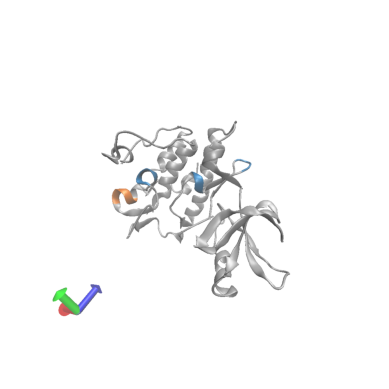

In [59]:
# Visualizing 3-helix(blue) and 5-helix(orange) with VMD at frame 0
import matplotlib.image as mpimg

img = mpimg.imread('hw1.tga')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

In [332]:
def residues_with_high_propensity(dssp_full, structure_str, residue_list):
    """
    Finding residues with > 90% propensity of a given secondary structure type.

    Parameters:
    - dssp_full: A numpy array containing DSSP annotations for each residue.
    - structure_str: The secondary structure type to search for.
    - residue_list: The list of residue numbers corresponding to the DSSP annotations.

    Returns:
    - res_idx: An array containing residue numbers with > 90% propensity of the given secondary structure type.
    """
    # Finding residues with the given secondary structure type
    dssp_struc = np.where(dssp_full == structure_str, 1, 0)
    prop = np.sum(dssp_struc, axis=0).astype(float) / len(dssp_struc)
    return residue_list[np.where(prop > 0.9)]

# Define the secondary structure types
struc_str_list = ['H', 'B', 'E', 'G', 'I', 'T', 'S', '']

# Iterate over secondary structure types and print residues with > 90% propensity
for letter in struc_str_list: 
    res_i = residues_with_high_propensity(dssp_full, letter, np.array(nres))
    print(f'Residues with >90% propensity of "{letter}": {res_i}')


Residues with >90% propensity of "H": [281 282 283 324 325 326 327 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354 355 410 411 422 423 424 425 426 427 428 429
 430 431 432 433 466 467 468 469 470 471 472 473 474 475 486 487 488 489]
Residues with >90% propensity of "B": [298]
Residues with >90% propensity of "E": [246 247 248 249 255 256 257 258 259 260 261 266 267 268 269 270 271 272
 301 302 303 304 313 314 315 369 370 371 377 378 379 392 393 394 415 416
 417]
Residues with >90% propensity of "G": []
Residues with >90% propensity of "I": []
Residues with >90% propensity of "T": [262 263 264 265 275 276 277 296 297 319 320 332 333 334 358 418 419 434
 435]
Residues with >90% propensity of "S": [307 308 309 310 390 391 414 436 439 440 478 479 483]
Residues with >90% propensity of "": []


***HOMEWORK Problem 2***

**Identify a residue that has a substantial population (>10%) of a second secondary structure assignment 
(for example something that is 50% helix/ 50% coil or 80% helix/ 20% coil) and make representative snapshots to illustrate the 2 conformations.  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation**

In [159]:
#Find all the frames where a residue 262 is H or C
residue_number = 262  
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])

helix_frames = np.where(np.logical_or.reduce((dssp_full[:, array_index] == 'H', dssp_full[:, array_index] == 'G', dssp_full[:, array_index] == 'I')), True, False)
coil_frames = np.where(np.logical_or.reduce((dssp_full[:, array_index] == 'T', dssp_full[:, array_index] == 'S', dssp_full[:, array_index] == ' ')), True, False)

print("Residue %s"%np.asarray(residue_num)[array_index])
print("Frames where residue at index %s is in helix: %s" % (array_index, np.where(helix_frames)[0]))
print("Frames where residue at index %s is in coil: %s" % (array_index, np.where(coil_frames)[0]))


262
Residue 262
Frames where residue at index 20 is in helix: [   6    7    9   10   11   16   29   40   45   61   63   64   65   67
   68   72   74   76   77   81   86   87   96   97  114  115  116  118
  119  123  124  125  128  130  131  132  135  138  139  140  146  148
  150  152  153  154  155  156  157  158  159  160  161  162  163  164
  167  168  170  172  179  183  190  192  197  199  204  206  209  210
  216  222  227  229  232  233  237  240  241  242  244  247  250  253
  254  255  256  257  259  260  263  265  267  268  271  275  277  279
  280  281  285  289  292  298  299  307  325  329  337  340  346  349
  351  354  370  371  381  383  384  385  386  391  392  393  402  403
  404  415  418  429  430  431  432  434  435  438  440  444  445  448
  449  452  453  460  461  462  463  482  491  503  505  559  576  579
  593  600  605  607  619  620  623  631  637  641  658  662  677  706
  729  735  738  741  742  743  744  756  761  764  765  767  768  770
  773  774  779

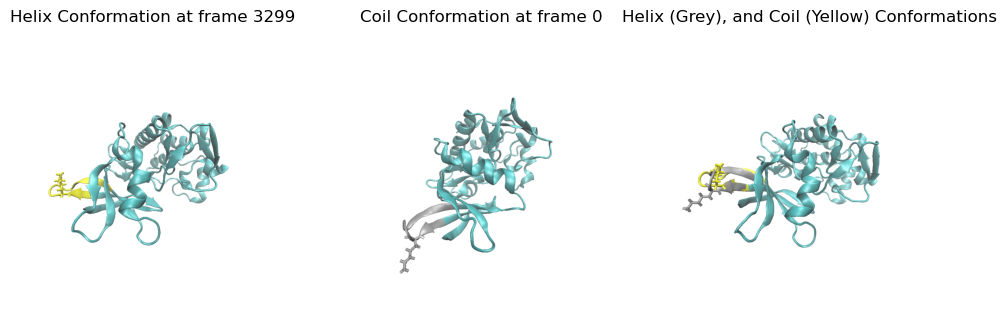

In [170]:
# Visualizing two different conformations
import matplotlib.image as mpimg

# Helix conformation
img1 = mpimg.imread('helixnew.tga')
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('Helix Conformation at frame 3299')

# Coil Conformation
img2 = mpimg.imread('coil.tga')
plt.subplot(1, 3, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('Coil Conformation at frame 0')


# Together in one image
img2 = mpimg.imread('helixvscoil.tga')
plt.subplot(1, 3, 3)
plt.imshow(img2)
plt.axis('off')
plt.title('Helix (Grey), and Coil (Yellow) Conformations')


plt.show()


In [140]:
indices_phi229, phis229 = md.compute_phi(trj)
indices_psi229, psis229 = md.compute_psi(trj)
indices_chi1229, chi1s229 = md.compute_chi1(trj)
indices_chi2229, chi2s229 = md.compute_chi2(trj)

print(np.shape(phis229[:,0]))
print(np.shape(indices_phi229[:,0]))

(4000,)
(251,)


In [185]:
#Find all the frames where a given residue is H or E
residue_number=340
array_index=residue_number-242
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')
beta_frames=np.where(dssp[:,array_index]=='E')

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helix_frames:",helix_frames)
print("helix_frames:",beta_frames)

340
Residue 340
helix_frames: (array([   0,    1,    2, ..., 3997, 3998, 3999]),)
helix_frames: (array([], dtype=int64),)


In [186]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [187]:
np.shape(phis[:,0])

(4000,)

In [188]:
np.shape(indices_phi[:,0])

(251,)

In [189]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [190]:
sequence

' [ILE242, THR243, MET244, LYS245, HIS246, LYS247, LEU248, GLY249, GLY250, GLY251, GLN252, TYR253, GLY254, GLU255, VAL256, TYR257, GLU258, GLY259, VAL260, TRP261, LYS262, LYS263, TYR264, SER265, LEU266, THR267, VAL268, ALA269, VAL270, LYS271, THR272, LEU273, LYS274, GLU275, ASP276, THR277, MET278, GLU279, VAL280, GLU281, GLU282, PHE283, LEU284, LYS285, GLU286, ALA287, ALA288, VAL289, MET290, LYS291, GLU292, ILE293, LYS294, HIS295, PRO296, ASN297, LEU298, VAL299, GLN300, LEU301, LEU302, GLY303, VAL304, CYS305, THR306, ARG307, GLU308, PRO309, PRO310, PHE311, TYR312, ILE313, ILE314, THR315, GLU316, PHE317, MET318, THR319, TYR320, GLY321, ASN322, LEU323, LEU324, ASP325, TYR326, LEU327, ARG328, GLU329, CYS330, ASN331, ARG332, GLN333, GLU334, VAL335, ASN336, ALA337, VAL338, VAL339, LEU340, LEU341, TYR342, MET343, ALA344, THR345, GLN346, ILE347, SER348, SER349, ALA350, MET351, GLU352, TYR353, LEU354, GLU355, LYS356, LYS357, ASN358, PHE359, ILE360, HIS361, ARG362, ASP363, LEU364, ALA365, ALA36

In [191]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




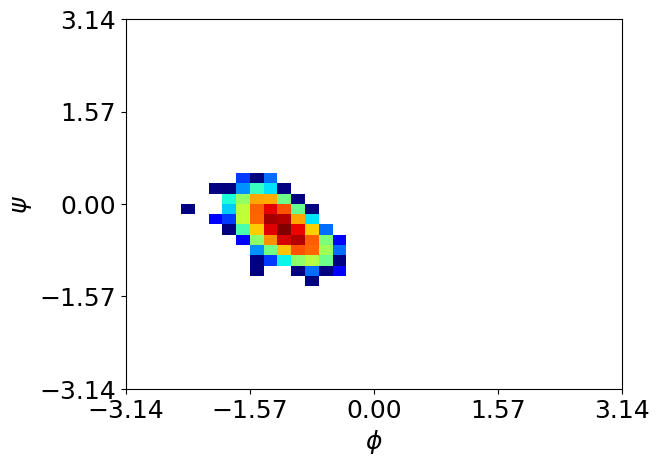

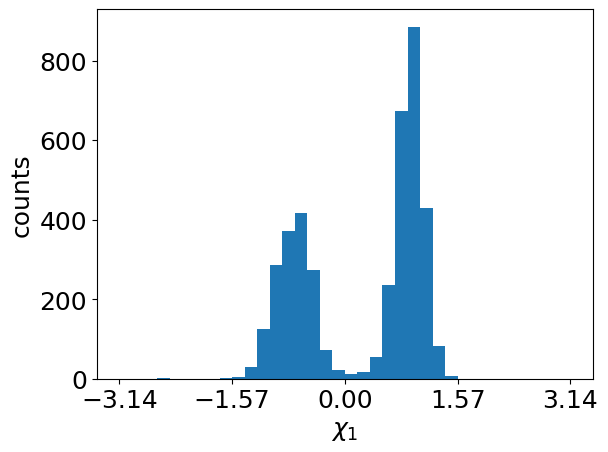

<Figure size 640x480 with 0 Axes>

In [219]:
plot_phipsi(319)
plt.clf()
plot_chi(319)

In [207]:
#Lets Visualize Some Rotamers
#Lets Find all the ASP residues and plot thier X1 values
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
THR_indices=np.where(resnames=='THR')
THR_resnums=resnums[THR_indices]
THR_resnums

array([243, 267, 272, 277, 306, 315, 319, 345, 389, 392, 394, 406, 434])

Residue 243


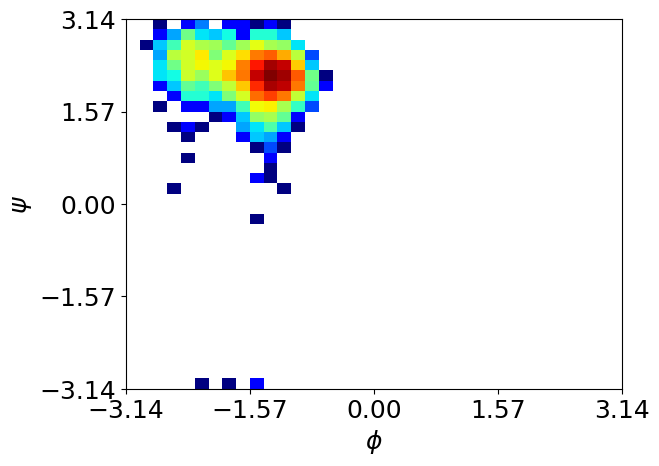

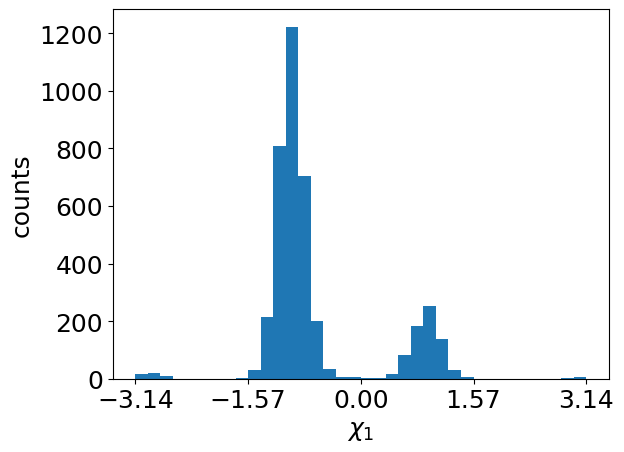

Residue 267


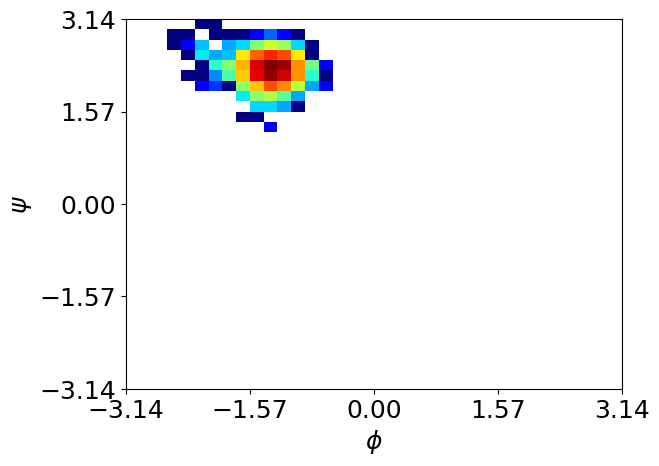

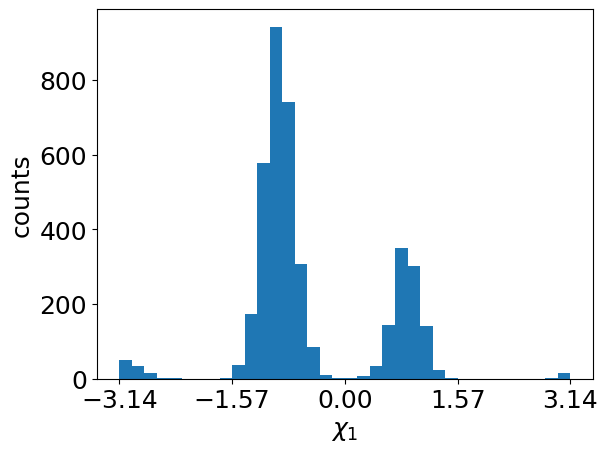

Residue 272


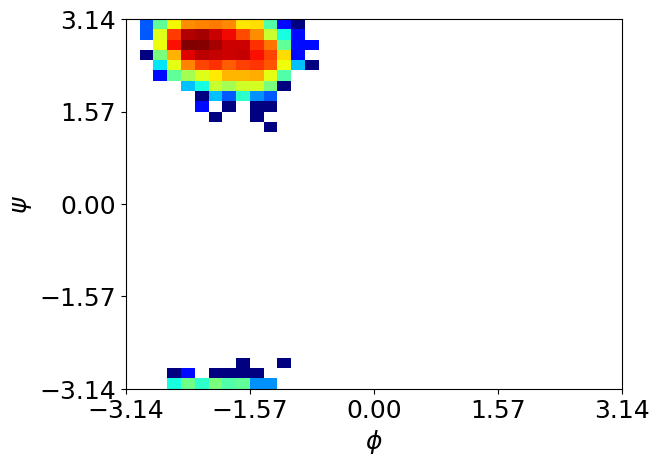

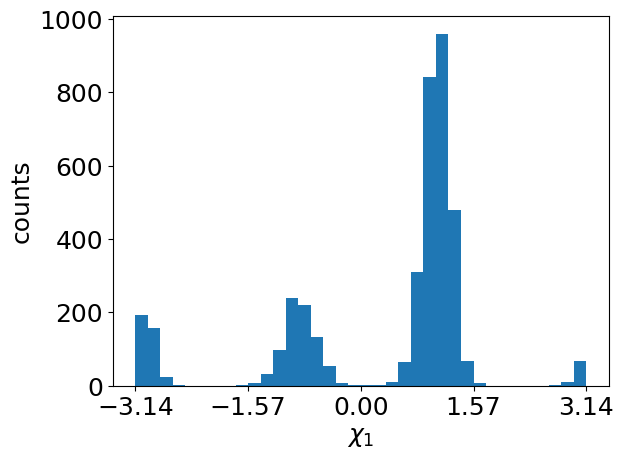

Residue 277


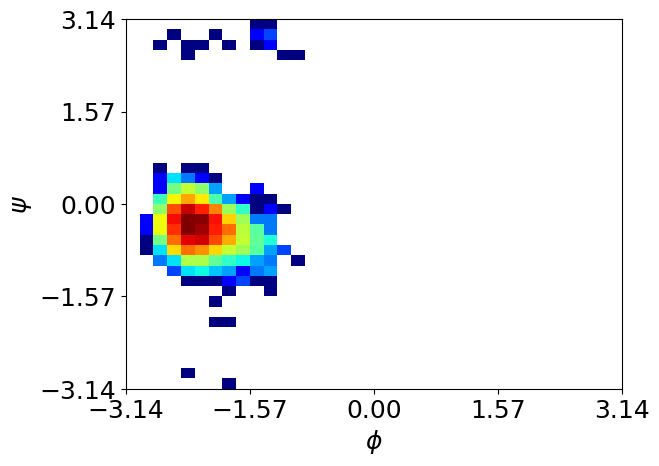

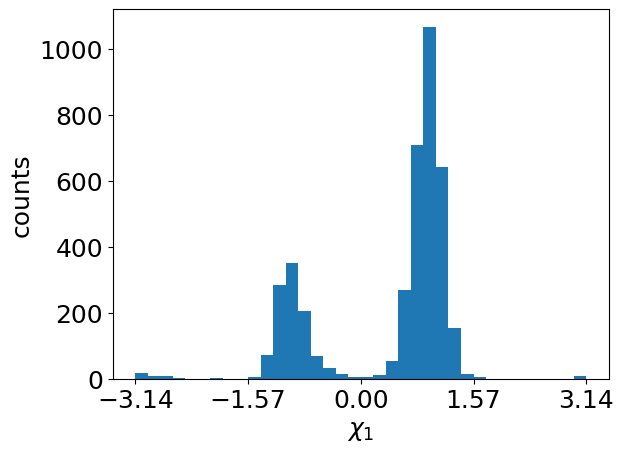

Residue 306


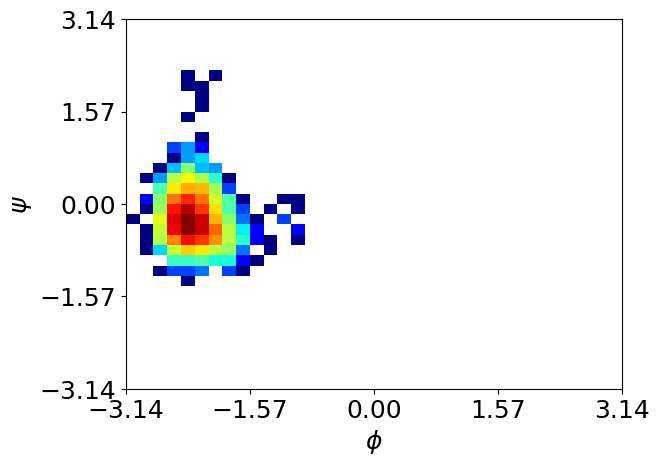

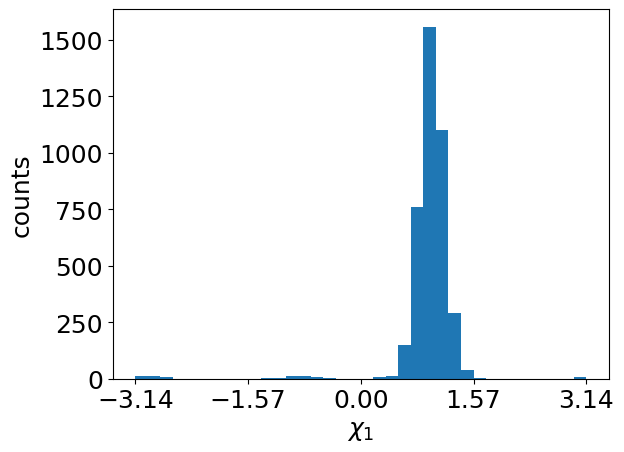

Residue 315


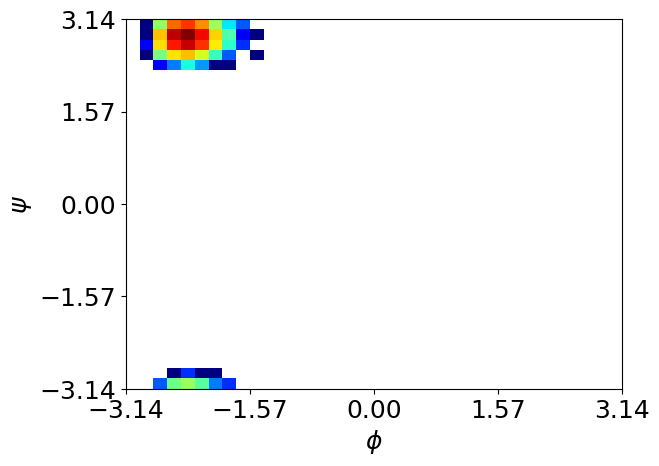

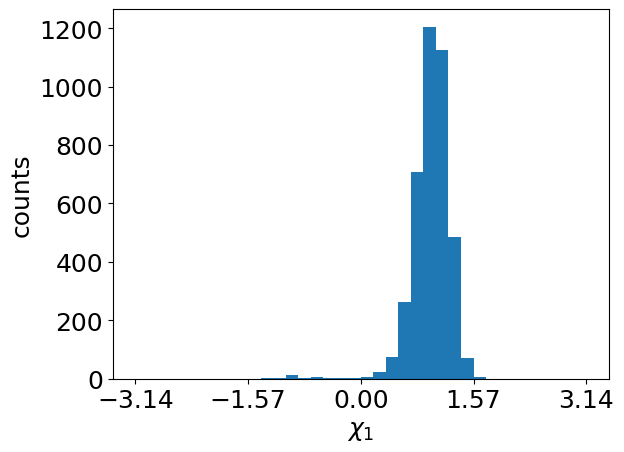

Residue 319


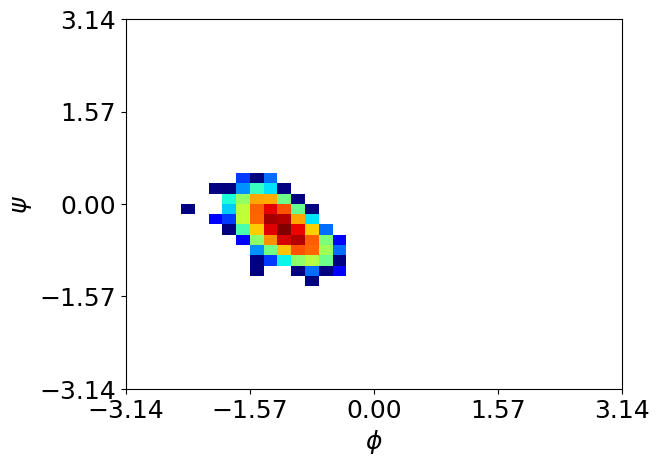

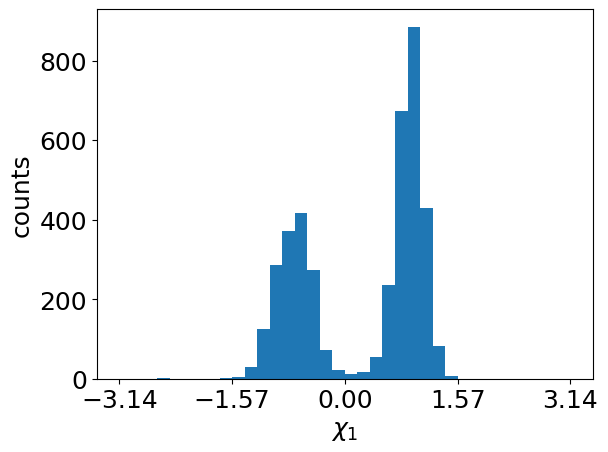

Residue 345


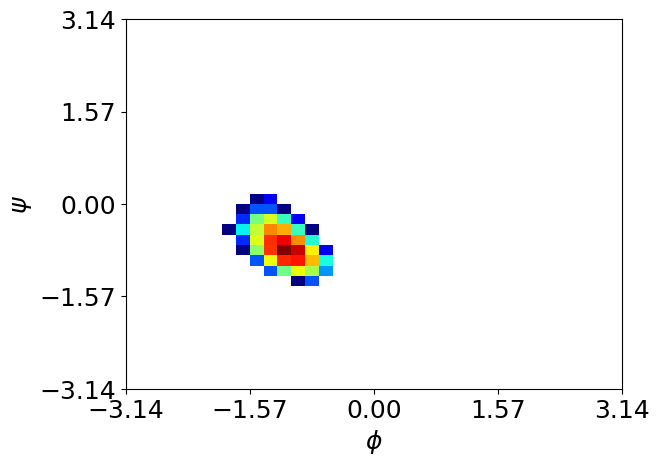

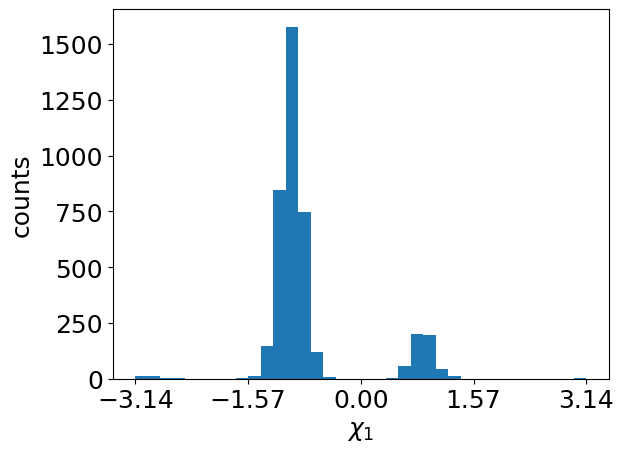

Residue 389


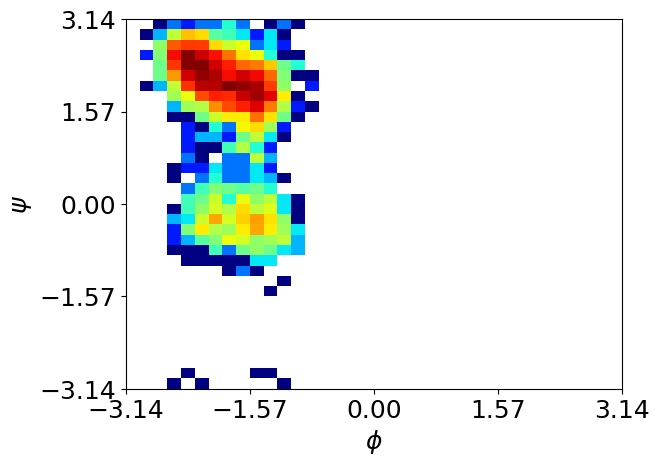

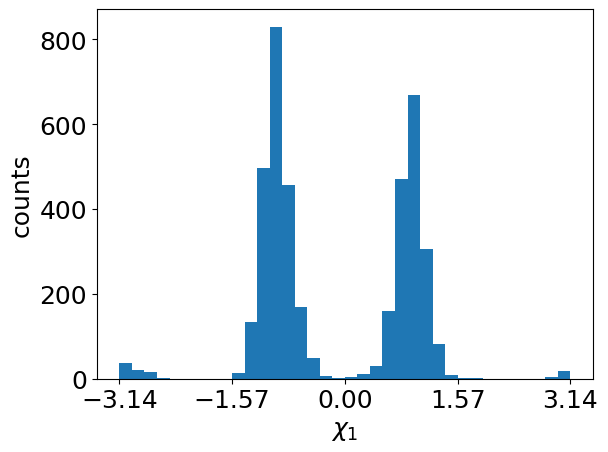

Residue 392


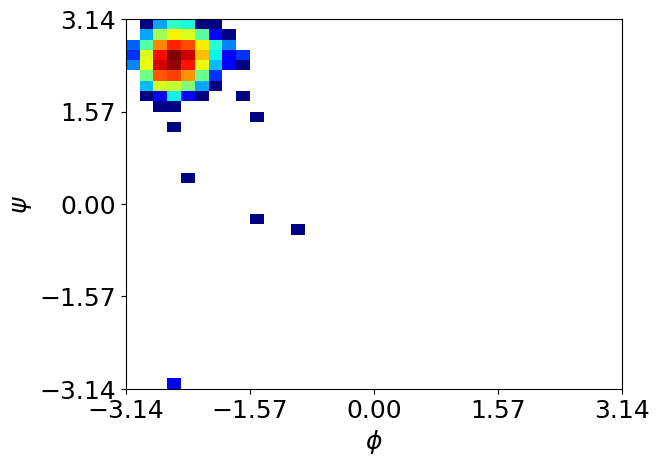

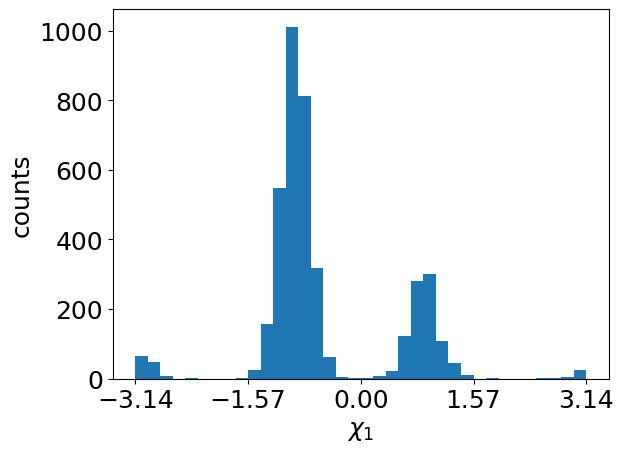

Residue 394


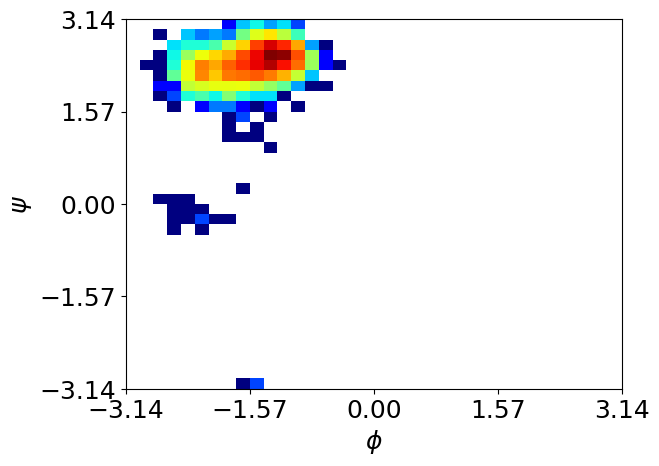

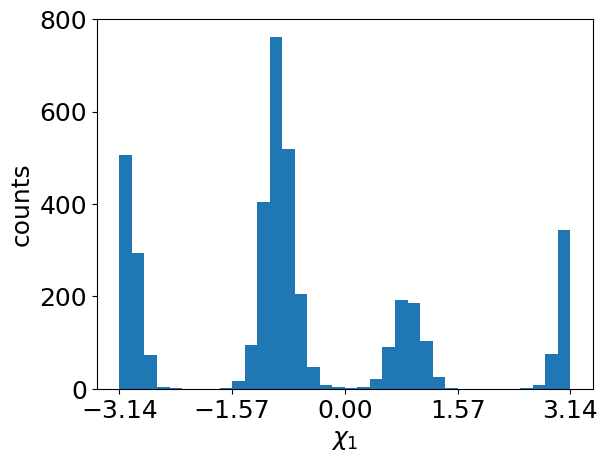

Residue 406


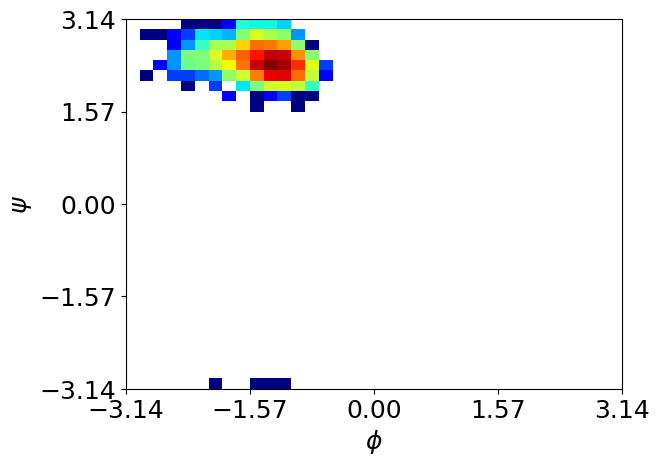

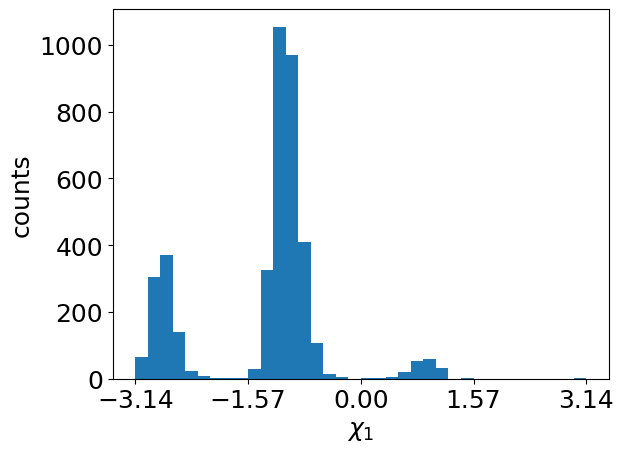

Residue 434


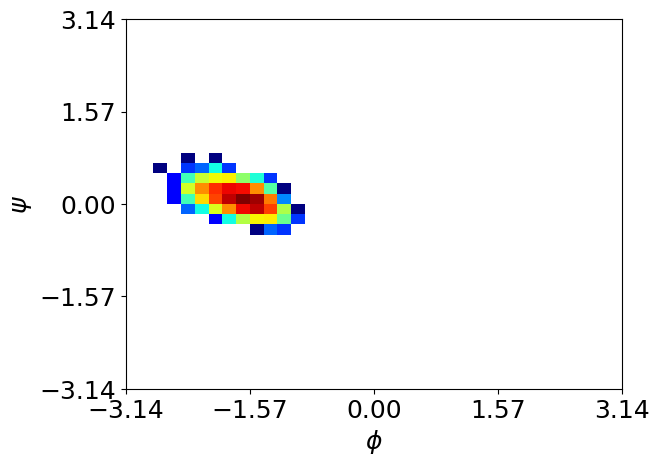

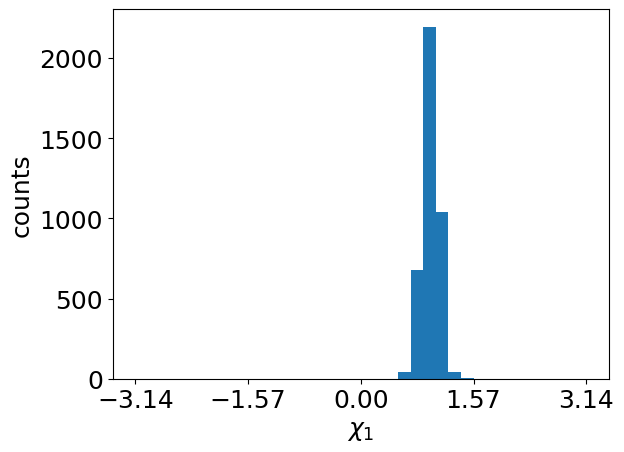

<Figure size 640x480 with 0 Axes>

In [208]:
for i in THR_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

***HOMEWORK Problem 3***

**Identify a residue that has 2 rotameric states and make representative snapshots to illustrate the 2 conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the Chi 1 histogram (or Chi1/Chi2 if the residue has a Chi2 degree of freedom) and add a marking to the plot to indicate the dihedrals shown in your snapshot**



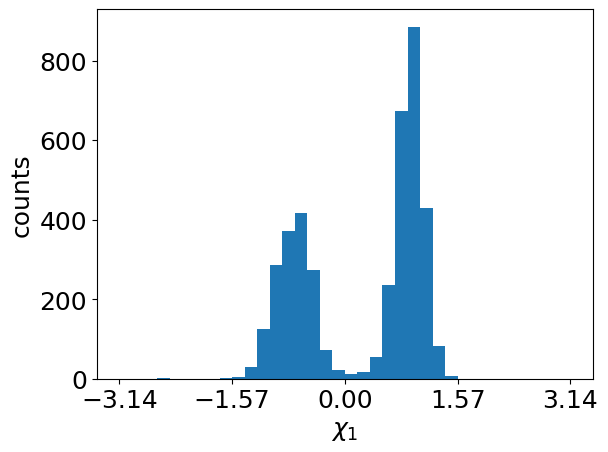

two rotameric states are available: g+ and g-


<Figure size 640x480 with 0 Axes>

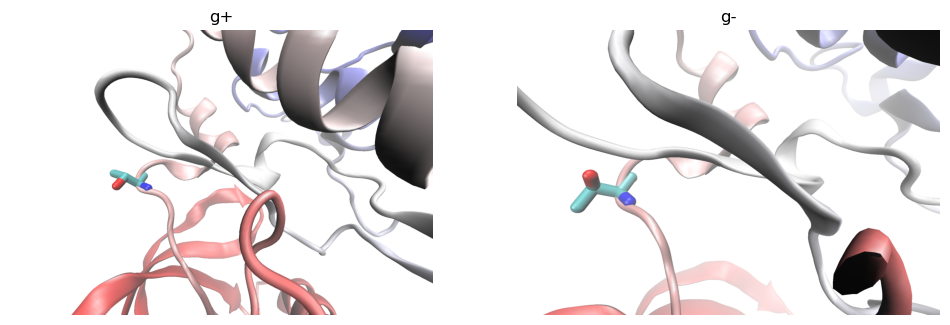

In [217]:
#I looked at THR319 
#Identifying 2 rotameric states,and plotting Chi1
plot_chi(319)
plt.clf()

print("two rotameric states are available: g+ and g-")



#snapshots of 2 rotameric states
# g+(60)
img1 = mpimg.imread('plusg.tga')
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('g+')

# g-(-60)
img2 = mpimg.imread('minusg.tga')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('g-')


plt.show()


***HOMEWORK Problem 4***

**Identify a residue that has 2 phi/psi free energy minima states and make representative snapshots to illustrate representative conformations (or a single snapshot with an overlay of two representative conformations).  Can you identify any other structural changes in the vicinity of that residue that favor the 2nd conformation.  Make a plot of the phi/psi histograms and add marking to the plot to indicate the phi/psi angles shown in your snapshot**


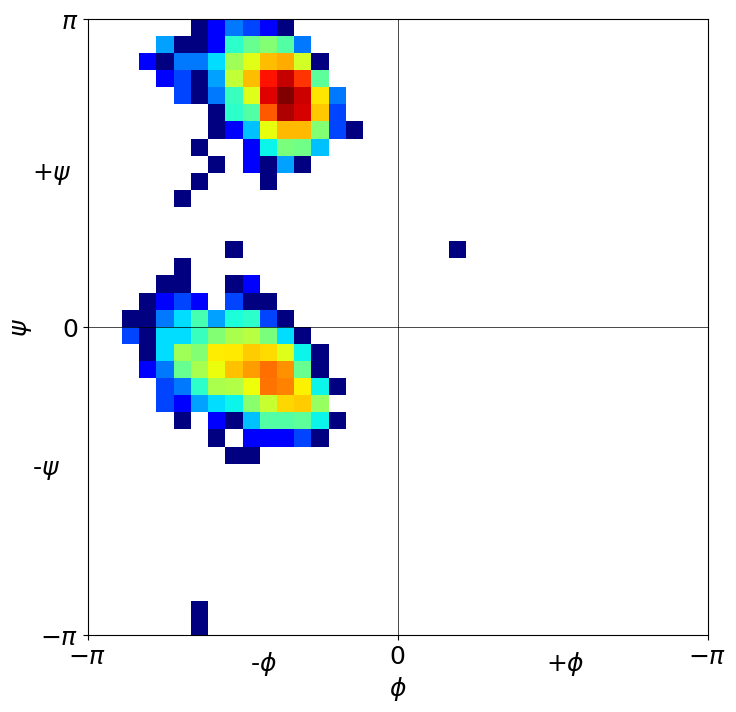

In [305]:
import matplotlib.colors as colors

def plot_phipsi(res):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot histogram
    hist, xedges, yedges, im = ax.hist2d(dihedral_dict['phi'][res], dihedral_dict['psi'][res],
                                          bins=36, range=[[-3.14, 3.14], [-3.14, 3.14]],
                                          norm=colors.LogNorm(), cmap='jet')

    # Customize axes ticks and labels
    ax.set_xlabel('$\phi$', size=18)
    ax.set_ylabel('$\psi$', size=18)

    # Set x-axis ticks and labels
    ax.set_xticks([-3.14, 0, 3.14])
    ax.set_xticklabels(['$-\pi$', '0', '$-\pi$'], fontsize=18)

    # Set y-axis ticks and labels
    ax.set_yticks([-3.14, 0, 3.14])
    ax.set_yticklabels(['$-\pi$', '0', '$\pi$'], fontsize=18)

    # Draw horizontal and vertical lines to divide the plot into quadrants
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    # Add labels to the quadrants
    ax.text(-3.7, 1.5, '+$\psi$', fontsize=18, color='black')
    ax.text(-3.7, -1.5, '-$\psi$', fontsize=18, color='black')
    ax.text(-1.5, -3.5, '-$\phi$', fontsize=18, color='black')
    ax.text(1.5, -3.5, '+$\phi$', fontsize=18, color='black')

    # Show the plot
    plt.tick_params(labelsize=18)
    plt.show()

    return
#Lets identify 2 free energy minima
plot_phipsi(462)


HERE IS MY ANSWER: GLU462 exhibits two energy minima, with one representing a beta-sheet ('$\psi$') conformation and the other representing a right-handed alpha helix ('-$\psi$') conformation.

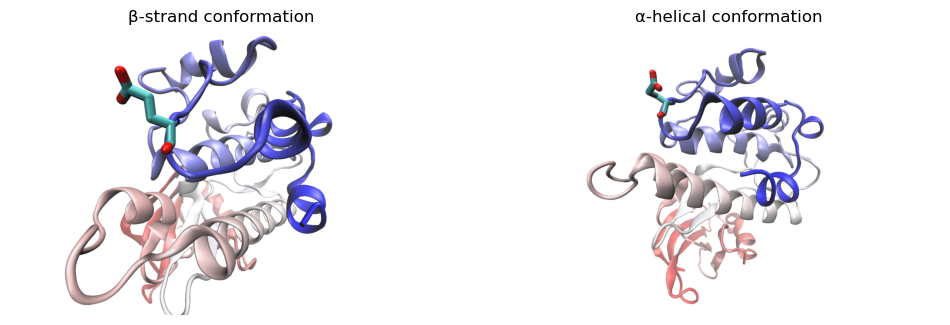

In [306]:
#Visulaizing 2 different free energy minima states

#snapshots of 2 different conformations

# β-strand conformation
img1 = mpimg.imread('Bsheet.tga')
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis('off')
plt.title('β-strand conformation')

# α-helical conformation
img2 = mpimg.imread('righthandedhelix.tga')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis('off')
plt.title('α-helical conformation')


plt.show()


***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**


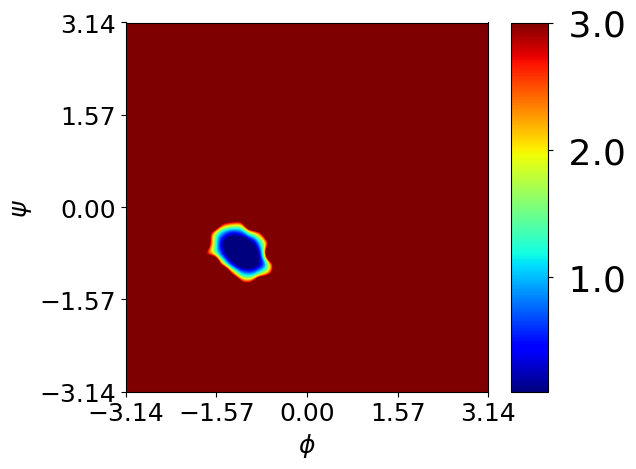

In [333]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['psi'][res],dihedral_dict['phi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return



plot_phipsi_FES(350)

Here is my Answer:####################################################################################################

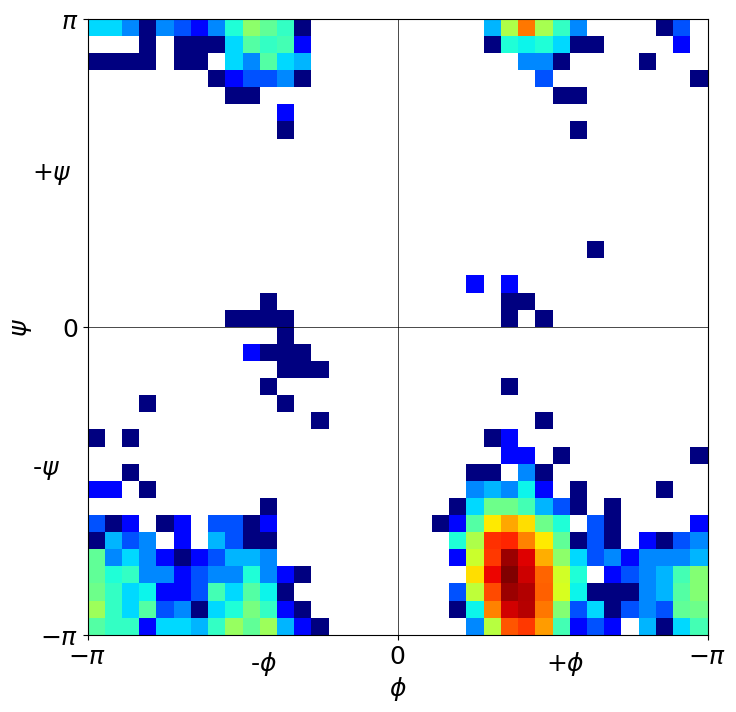

In [334]:
plot_phipsi(390)

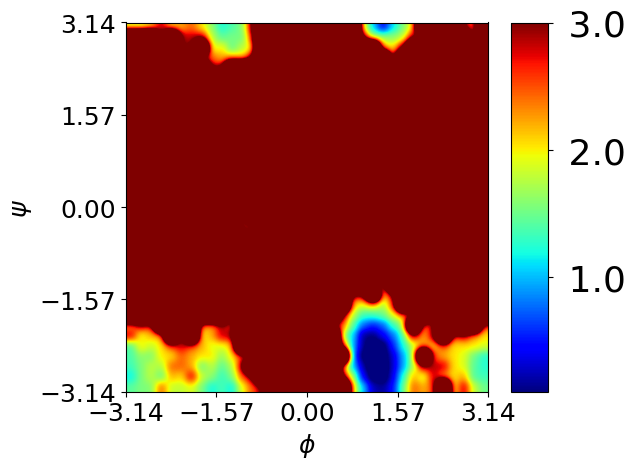

In [335]:
plot_phipsi_FES(390)